In [14]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C60_cherry_only_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [15]:
data

['t_n55         11.3995 (10.7086, 12.1238) (10.6994, 12.1083)  1.4089 (Jnode 106)\n',
 't_n56         11.3014 (10.6348, 11.9835) (10.6391, 11.9851)  1.3460 (Jnode 105)\n',
 't_n57         10.7047 (10.0970, 11.3164) (10.0881, 11.3055)  1.2174 (Jnode 104)\n',
 't_n58          9.1809 ( 8.7080,  9.6459) ( 8.7055,  9.6407)  0.9352 (Jnode 103)\n',
 't_n59          8.9277 ( 8.4695,  9.3755) ( 8.4706,  9.3762)  0.9056 (Jnode 102)\n',
 't_n60          8.5564 ( 8.1163,  8.9851) ( 8.1167,  8.9852)  0.8685 (Jnode 101)\n',
 't_n61          8.0096 ( 7.5946,  8.4188) ( 7.5886,  8.4112)  0.8226 (Jnode 100)\n',
 't_n62          3.7003 ( 3.3056,  4.1237) ( 3.3070,  4.1239)  0.8169 (Jnode 99)\n',
 't_n63          5.7445 ( 5.3781,  6.1111) ( 5.3796,  6.1119)  0.7323 (Jnode 98)\n',
 't_n64          4.2383 ( 3.9239,  4.5891) ( 3.9185,  4.5831)  0.6646 (Jnode 97)\n',
 't_n65          3.7938 ( 3.5078,  4.1217) ( 3.5054,  4.1183)  0.6129 (Jnode 96)\n',
 't_n66          3.0272 ( 2.7841,  3.3206) ( 2.7717,  3.30

In [16]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [17]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    if line[3].startswith('('):
        lower_ci_iqtree.append(float(line[3][1:-1]))
    else:
        lower_ci_iqtree.append(float(line[3][1:-1]))
    if line[4].startswith('('):
        upper_ci_iqtree.append(float(line[4][1:-1]))
    else:
        upper_ci_iqtree.append(float(line[4][:-1]))
    # posterior_mean_baseml.append(float(line[4]))
    # lower_ci_baseml.append(float(line[5]))
    # upper_ci_baseml.append(float(line[6]))
#
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [18]:
node_name

['t_n55',
 't_n56',
 't_n57',
 't_n58',
 't_n59',
 't_n60',
 't_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107']

In [19]:
posterior_mean_iqtree

[11.3995,
 11.3014,
 10.7047,
 9.1809,
 8.9277,
 8.5564,
 8.0096,
 3.7003,
 5.7445,
 4.2383,
 3.7938,
 3.0272,
 2.1376,
 1.4565,
 0.6374,
 4.358,
 8.724,
 8.421,
 8.0064,
 5.858,
 5.2918,
 5.1249,
 8.4656,
 8.0983,
 7.7919,
 7.3274,
 6.7141,
 6.524,
 5.7501,
 5.2809,
 4.8747,
 3.7109,
 3.4394,
 5.7763,
 4.7246,
 8.2994,
 1.8176,
 8.076,
 7.5996,
 6.8263,
 6.3755,
 4.7435,
 5.3881,
 6.5508,
 6.2926,
 5.867,
 4.418,
 5.6667,
 9.7422,
 7.3144,
 4.6458,
 3.6021,
 7.5072]

In [20]:
lower_ci_iqtree

[2.1238,
 1.9835,
 1.3164,
 0.708,
 0.4695,
 0.1163,
 0.5946,
 0.3056,
 0.3781,
 0.9239,
 0.5078,
 0.7841,
 0.9577,
 0.3302,
 0.6154,
 0.9949,
 0.2765,
 0.9547,
 0.6036,
 0.4494,
 0.8695,
 0.0459,
 0.0396,
 0.6824,
 0.3881,
 0.9365,
 0.3448,
 0.1529,
 0.4002,
 0.9404,
 0.5402,
 0.4059,
 0.1394,
 0.4167,
 0.3706,
 0.8791,
 0.4352,
 0.668,
 0.2208,
 0.4869,
 0.056,
 0.4028,
 0.1168,
 0.1972,
 0.9366,
 0.5028,
 0.0244,
 0.2149,
 0.1791,
 0.7171,
 0.0425,
 0.0011,
 0.6834]

In [21]:
upper_ci_iqtree

[10.6994,
 10.6391,
 10.0881,
 9.6459,
 9.3755,
 8.9851,
 8.4188,
 4.1237,
 6.1111,
 4.5891,
 4.1217,
 3.3206,
 2.3523,
 1.608,
 0.6925,
 4.7334,
 9.1668,
 8.8855,
 8.4051,
 6.2683,
 5.7114,
 5.3313,
 8.8806,
 8.4991,
 8.1816,
 7.7053,
 7.0661,
 6.8789,
 6.0851,
 5.5997,
 5.1865,
 3.9947,
 3.7197,
 6.1349,
 5.0719,
 8.7067,
 2.2404,
 8.4729,
 7.9559,
 7.1303,
 6.6359,
 5.0497,
 5.527,
 6.8887,
 6.6292,
 6.2192,
 4.8058,
 6.0897,
 10.3126,
 7.8843,
 5.2294,
 4.1306,
 8.3617]

In [22]:
file_LG = open("LG_cherry_only_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
    if line[3].startswith('('):
        lower_ci_baseml.append(float(line[3][1:-1]))
    else:
         lower_ci_baseml.append(float(line[3][:-1]))
    if line[4].startswith('('):
        upper_ci_baseml.append(float(line[4][1:-1]))
    else:
         upper_ci_baseml.append(float(line[4][:-1]))
        
    
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

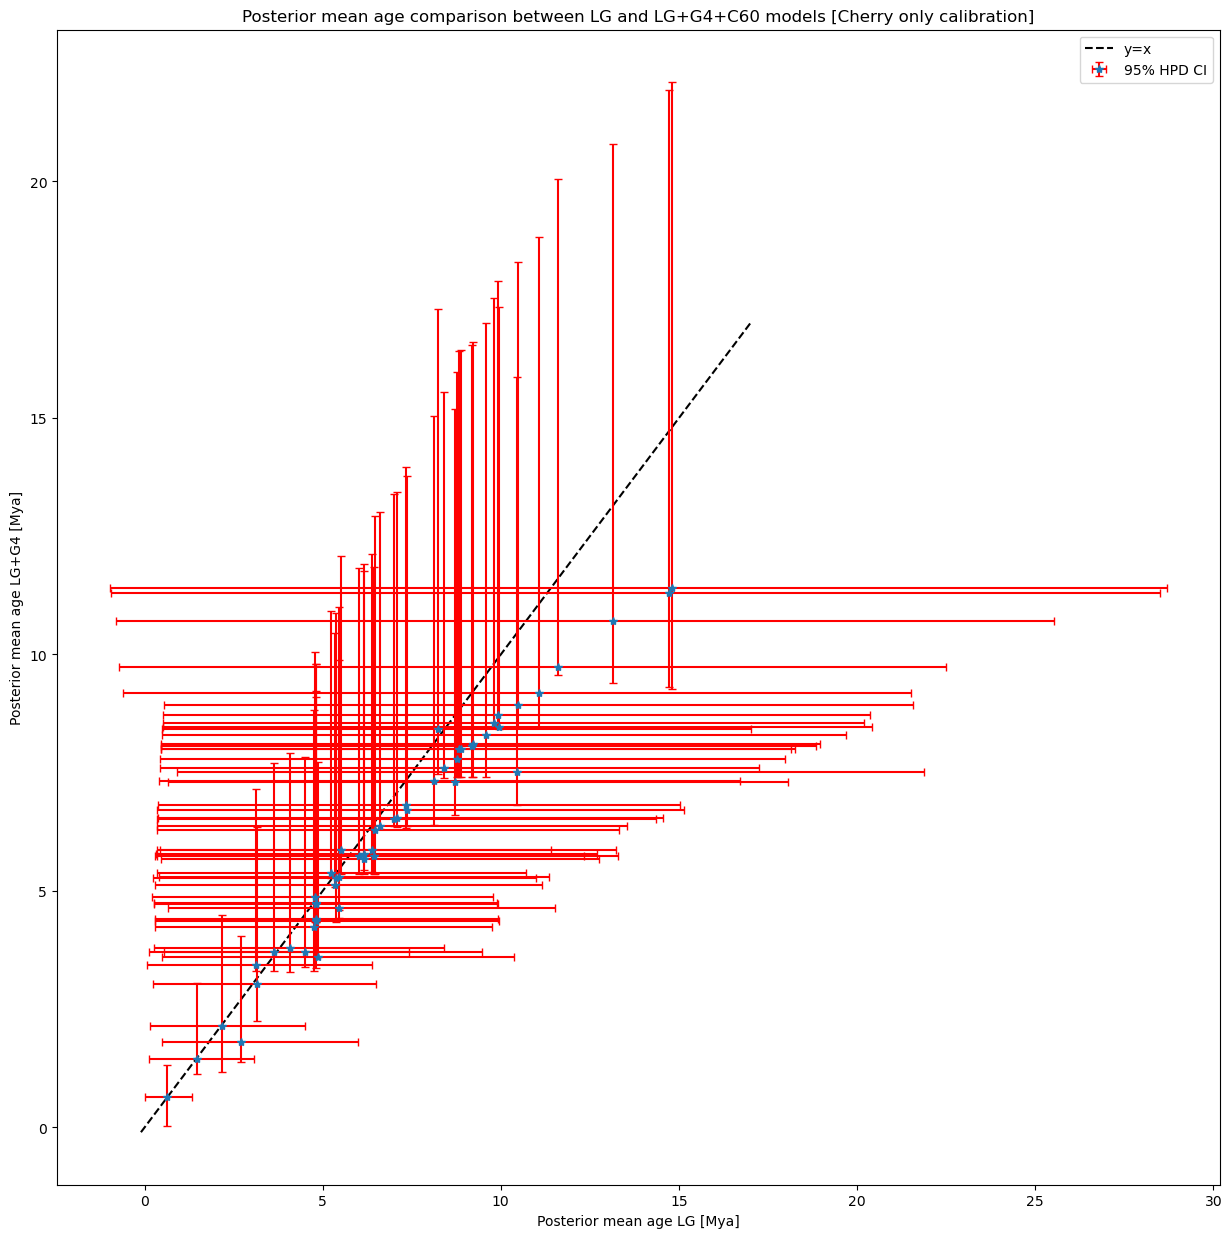

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot([-0.1,17], 
        [-0.1, 17], 
        'k--', label='y=x')
ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
            xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')

# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4+C60 models [Cherry only calibration]')
ax.legend()

# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_C60_co.png')

In [24]:
posterior_mean_baseml

[14.8117,
 14.7114,
 13.1579,
 11.0589,
 10.4949,
 9.8228,
 8.8873,
 4.5045,
 6.4531,
 4.7468,
 4.0766,
 3.1552,
 2.1717,
 1.4798,
 0.6362,
 4.8084,
 9.9083,
 8.2483,
 8.8261,
 6.3902,
 5.4595,
 5.36,
 9.9417,
 9.2289,
 8.7576,
 8.1385,
 7.3734,
 6.9961,
 6.0182,
 5.3633,
 4.7739,
 3.6266,
 3.1194,
 6.1687,
 4.7997,
 9.5877,
 2.7172,
 9.1794,
 8.4084,
 7.3283,
 6.6006,
 4.8023,
 5.2294,
 7.0783,
 6.4674,
 5.5236,
 4.8052,
 6.1483,
 11.5997,
 8.7039,
 5.4564,
 4.882,
 10.4612]

In [25]:
posterior_mean_iqtree

[11.3995,
 11.3014,
 10.7047,
 9.1809,
 8.9277,
 8.5564,
 8.0096,
 3.7003,
 5.7445,
 4.2383,
 3.7938,
 3.0272,
 2.1376,
 1.4565,
 0.6374,
 4.358,
 8.724,
 8.421,
 8.0064,
 5.858,
 5.2918,
 5.1249,
 8.4656,
 8.0983,
 7.7919,
 7.3274,
 6.7141,
 6.524,
 5.7501,
 5.2809,
 4.8747,
 3.7109,
 3.4394,
 5.7763,
 4.7246,
 8.2994,
 1.8176,
 8.076,
 7.5996,
 6.8263,
 6.3755,
 4.7435,
 5.3881,
 6.5508,
 6.2926,
 5.867,
 4.418,
 5.6667,
 9.7422,
 7.3144,
 4.6458,
 3.6021,
 7.5072]

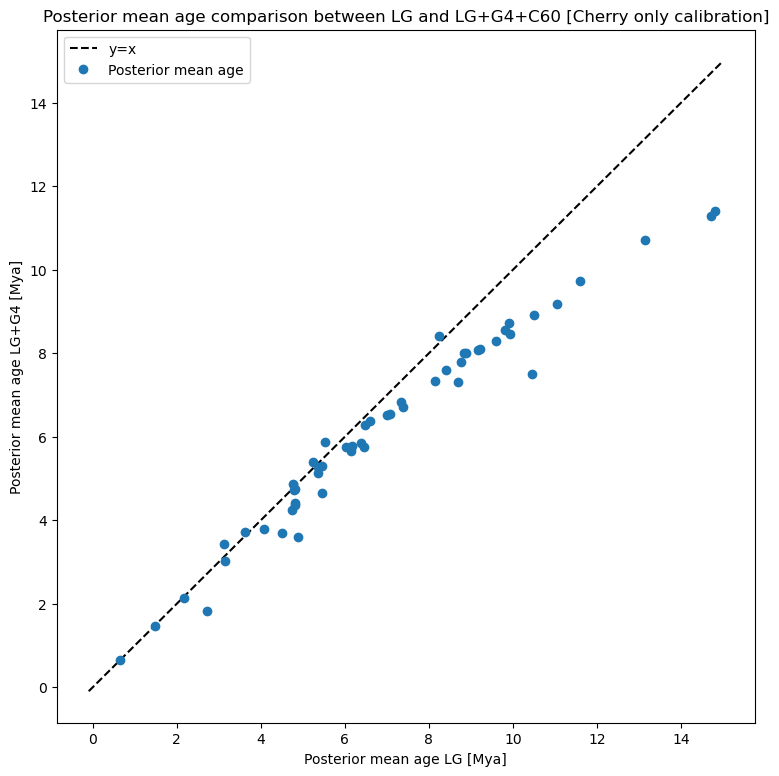

In [26]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,15], 
        [-0.1, 15], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4+C60 [Cherry only calibration]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_C60_co_scatter.png')